# Angry-Relaxed Images Classification
## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [4]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Please install GPU version of TF


In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'angry classification.ipynb',
 'data',
 'logs',
 'model.ipynb',
 'requirements.txt',
 'venv']

## 2. Remove dodgy images

In [6]:
data_dir = 'data' # datasets directory
image_extensions = ['jpeg','jpg','bmp', 'png'] # image extensions 

In [7]:
# just check images in angry directory
os.listdir(os.path.join(data_dir, 'angry'))

['-woman-against-background-of-crowd-of-angry-people-with-fire-on-street-photo.jpg',
 '10-105059_angry-person-transparent-images-png-angry-person-transparent.png',
 '1000_F_233007798_QWxNPHc72uo3bwB6yL8z50tYKlDAFP5V.jpg',
 '139-1393790_angry-person-png-pic-angry-man-clipart-png.png',
 '18157917-five-angry-young-people-shout-and-wave-their-arms.jpg',
 '19_1016_DISCIPLESHIP_How-to-Deal-With-Angry-People_1021x640.jpg',
 '1w25F3sR1kwAJx6G6xnFUQA.jpeg',
 '231106-anger-stock-mb-1441-8d0d27.jpg',
 '360_F_197667405_ZWvFfmYWXANFZjUBumNvwcp9dr8Vcfb1.jpg',
 '360_F_220427132_eI9ZxwmFNFdzvLF5zlKxdAiaSadXGD3k.jpg',
 '5-53664_angry-person-png-transparent-png.png',
 '5-55393_angry-person-png-photo-angry-person-png-transparent.png',
 '5-55846_angry-people-png-transparent-images-standing-png-download.png',
 '5-56573_shout-angry-person-png-png-transparent-png.png',
 '60552212-angry-people-illustration-design-collection.jpg',
 '68-688804_angry-person-png-images-angry-man-transparent-png.png',
 'AF2bZyiypw

In [8]:
# just check a image by using opencv , which gives pixel values in array
cv2.imread(os.path.join(data_dir, 'angry', 'images39.jpg'))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [245, 244, 246],
        [248, 248, 248],
        [253, 253, 253]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]]

In [9]:
sample_img = cv2.imread(os.path.join(data_dir, 'angry', 'images39.jpg'))
sample_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [245, 244, 246],
        [248, 248, 248],
        [253, 253, 253]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]]

In [10]:
type(sample_img) # cv2.imread gives numpy array for image


numpy.ndarray

In [11]:
sample_img.shape  

(194, 259, 3)

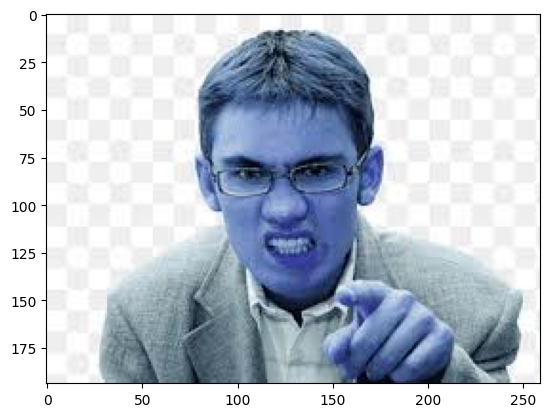

In [12]:
plt.imshow(sample_img)

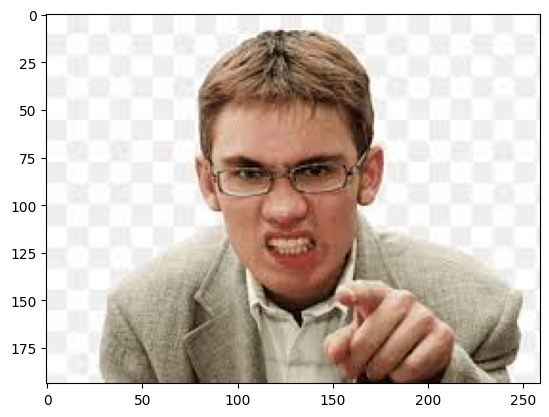

In [13]:
# cv2.cvtColor gives original look 
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# remove images which dont have above extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions: # if image not ends with jpg, jped, png and bmp will be removed
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}.")
           # os.remove(image_path)

## 3. Load Data

In [15]:
tf.keras.utils.image_dataset_from_directory('data')

Found 310 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
# load all images from 'data' directory
images = tf.keras.utils.image_dataset_from_directory('data')

Found 310 files belonging to 2 classes.


In [17]:
type(images)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [18]:
images

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## 4. Preprocessing
### 4.1. Scaling

In [19]:
# we know that our data has 2 features,
# one is image tensor and other is label tensor
# following line scale our data to in between 0 to 1, and label still remain same
data = images.map(lambda x,y: (x/255, y))

In [20]:
len(images)

10

In [21]:
len(data)

10

In [22]:
scaled_data_iterator = data.as_numpy_iterator()

In [23]:
type(scaled_data_iterator)

tensorflow.python.data.ops.dataset_ops.NumpyIterator

In [24]:
scaled_data_iterator.next()[0].min(), scaled_data_iterator.next()[0].max()

(0.0, 1.0)

In [25]:
scaled_data_iterator.next()[1] # labels for angry and relaxed images

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

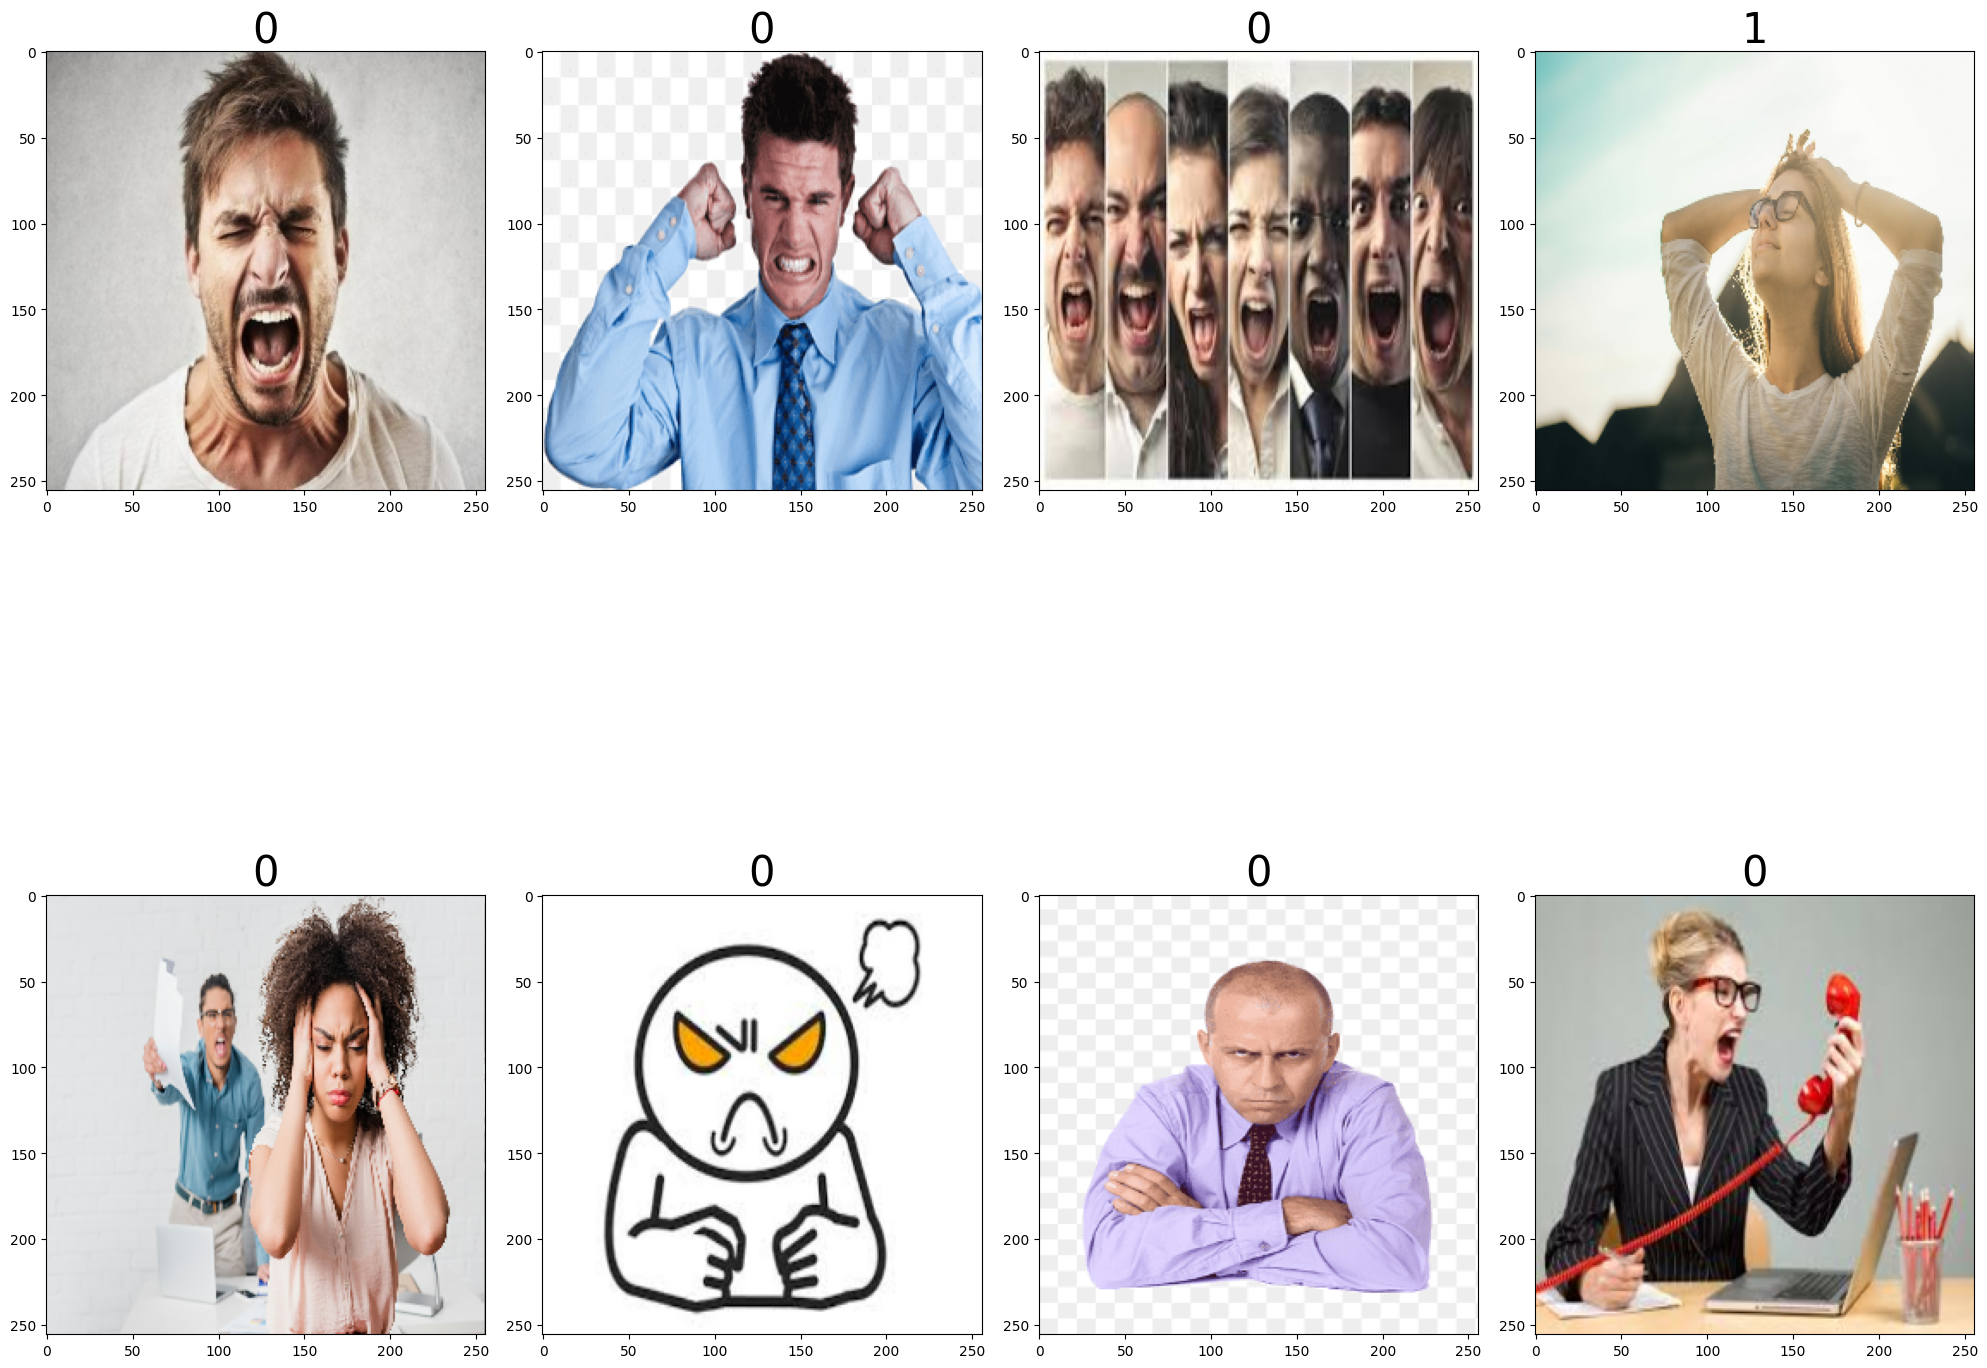

In [26]:
# lets check which label is set to our image classes
scaled_batch = scaled_data_iterator.next()
fig , ax = plt.subplots(nrows=2,ncols=4, figsize=(20, 20))
for index, image in enumerate(scaled_batch[0][:8]):
    row = index // 4
    col = index % 4
    ax[row, col].imshow(image)
    ax[row, col].set_title(scaled_batch[1][index], size=30)

plt.tight_layout()
plt.show()

- Here we get labels as 1 for relaxed and 0 for angry

## 4.2. Split data


In [27]:
len(data) # 

10

In [28]:
def split_dataset(dataset, train_ratio=0.7, val_ratio=0.2):
  """
  Splits a tf.data.Dataset into train, validation, and test sets.

  Args:
    dataset: The tf.data.Dataset to split.
    train_ratio: The proportion of data to use for training.
    val_ratio: The proportion of data to use for validation.

  Returns:
    train_dataset: tf.data.Dataset for training.
    val_dataset: tf.data.Dataset for validation.
    test_dataset: tf.data.Dataset for testing.
  """
  dataset_size = len(list(dataset))
  train_size = int(train_ratio * dataset_size)
  val_size = int(val_ratio * dataset_size)

  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size + val_size)

  return train_dataset, val_dataset, test_dataset

# Example usage
train_dataset, val_dataset, test_dataset = split_dataset(data)

In [29]:
print(train_dataset.element_spec)
print(test_dataset.element_spec)
print(val_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [30]:
train_size = len(list(train_dataset))
val_size = len(list(val_dataset))
test_size = len(list(test_dataset))

print("Train size:", train_size)
print("Validation size:", val_size)
print("Test size:", test_size)

Train size: 7
Validation size: 2
Test size: 1


## 5. Deep Learning Model 
### 5.1. Model Building

In [31]:

# Initialize a Sequential model
model = Sequential()

# Add an Input layer to specify the input shape of the images (256x256 with 3 color channels for RGB)
model.add(Input(shape=(256, 256, 3)))

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# Add a max pooling layer to reduce the spatial dimensions (downsampling) by taking the max value in 2x2 regions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer with 64 filters and a 3x3 kernel size; activation defaults to None if not specified
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second max pooling layer to further downsample the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a 3x3 kernel size; activation defaults to None if not specified
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third max pooling layer for further downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output from the previous layer into a 1D vector for the fully connected layers
model.add(Flatten())

# Add a fully connected (dense) layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add an output layer with a single unit and a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy as a performance metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [32]:
# lets check summay
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

### 5.2. Model Training

In [33]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [35]:
# Train your model and pass the callback
history = model.fit(
    train_dataset,
    epochs=50,
    batch_size= 32,
    validation_data=val_dataset,
    callbacks=[tensorboard_callback]


)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 961ms/step - accuracy: 0.9779 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9971 - loss: 0.0286 - val_accuracy: 0.9844 - val_loss: 0.0317
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9965 - loss: 0.0125 - val_accuracy: 0.9844 - val_loss: 0.0175
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9975 - loss: 0.0255 - val_accuracy: 0.9844 - val_loss: 0.0600
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9814 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 0.0267
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9896 - loss: 0.0394 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9897 - loss: 0.0215 - val_accuracy: 0.9844 - val_loss: 0.0186
Epoch 9/50
7/

Best epoch: 42


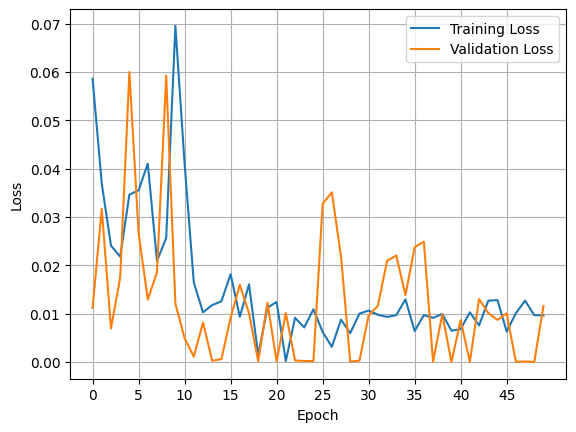

In [36]:
# Access the validation loss history
val_loss = history.history['val_loss']

# Find the epoch with the lowest validation loss
best_epoch = val_loss.index(min(val_loss)) + 1

# Print the best epoch
print(f'Best epoch: {best_epoch}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Add gridlines
plt.grid(True)

# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['loss']), 5))


plt.show()

### 5.3. Plot model training performance

In [37]:
# ... (previous code to determine best_epoch) ...

# Evaluate the model at the best epoch
loss = history.history['loss'][best_epoch - 1]
accuracy = history.history['accuracy'][best_epoch - 1]
val_loss = history.history['val_loss'][best_epoch - 1]
val_accuracy = history.history['val_accuracy'][best_epoch - 1]

print(f'Metrics at the best epoch ({best_epoch}):')
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Metrics at the best epoch (42):
Loss: 0.0103, Accuracy: 0.9911
Validation Loss: 0.0000, Validation Accuracy: 1.0000


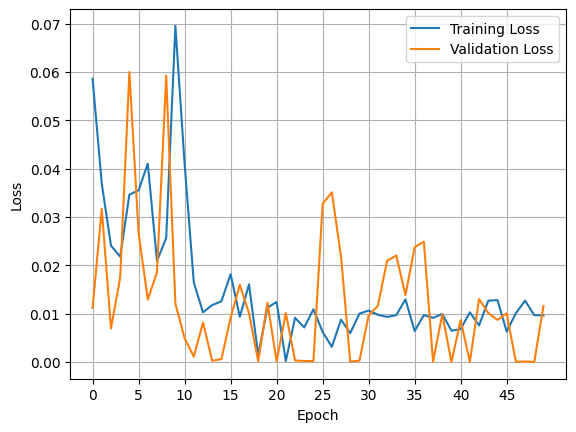

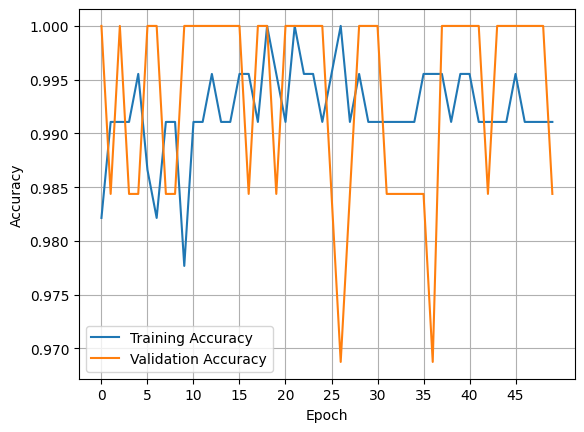

In [38]:
#Plot the metrics:
# Create plots of the training and validation loss and accuracy over all epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Add gridlines
plt.grid(True)
# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['val_loss']), 5))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Add gridlines
plt.grid(True)
# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['val_accuracy']), 5))
plt.show()

### 6. Model Evaluation

In [40]:
precision = Precision()
recall = Recall()
binary_accuracy = BinaryAccuracy()

In [41]:
len(test_dataset)

1

In [42]:
for batch in test_dataset.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    binary_accuracy.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


In [43]:
print(f"Precision: {precision.result()}")
print()
print(f"Recall: {recall.result()}")
print()
print(f"BinarY Accuracy: {binary_accuracy.result()}")


Precision: 1.0

Recall: 1.0

BinarY Accuracy: 1.0


## 7. Test the model

In [76]:
os.listdir(os.path.join('data', 'test_images'))

['angry1.webp', 'angry2.jpg', 'dq salman.jpg', 'relaxed nitya menon.jpg']

In [78]:
image1 = cv2.imread(os.path.join('data','test_images','angry2.jpg'))
image2 = cv2.imread(os.path.join('data', 'test_images','relaxed nitya menon.jpg'))

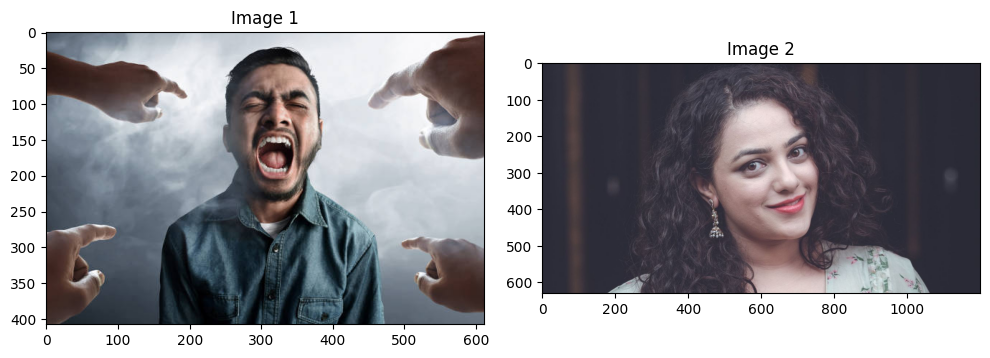

In [79]:

# Convert images from BGR to RGB (OpenCV loads images in BGR format)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot the first image
axes[0].imshow(image1)
# axes[0].axis('off')  # Hide the axes
axes[0].set_title('Image 1')

# Plot the second image
axes[1].imshow(image2)
#axes[1].axis('off')  # Hide the axes
axes[1].set_title('Image 2')

# Show the plot
plt.tight_layout()
plt.show()

In [80]:
print(f"shape of image 1: {image1.shape}")
print(f"shape of image 2: {image2.shape}")

shape of image 1: (408, 612, 3)
shape of image 2: (630, 1200, 3)


In [81]:
# lets resize images as same as training size
image1_resize = cv2.resize(image1, (256, 256))
image2_resize = cv2.resize(image2, (256, 256))

# shape of resized image
print(f"shape of image 1: {image1_resize.shape}")
print(f"shape of image 2: {image2_resize.shape}")

shape of image 1: (256, 256, 3)
shape of image 2: (256, 256, 3)


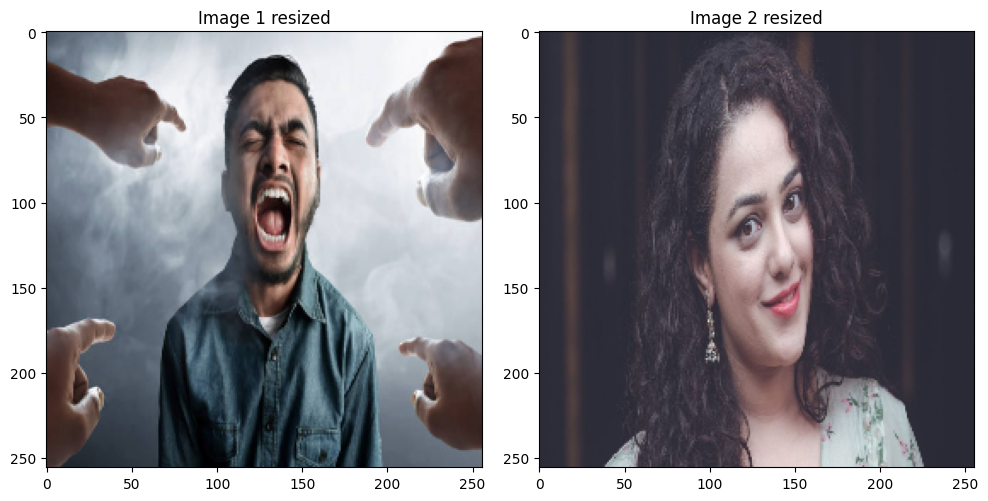

In [82]:
# plot images after resize
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot the first image
axes[0].imshow(image1_resize)
# axes[0].axis('off')  # Hide the axes
axes[0].set_title('Image 1 resized')

# Plot the second image
axes[1].imshow(image2_resize)
#axes[1].axis('off')  # Hide the axes
axes[1].set_title('Image 2 resized')

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
image1_resize.shape

(256, 256, 3)

In [84]:
np.expand_dims(image1_resize, axis=0).shape

(1, 256, 256, 3)

In [87]:
# Normalize the image to [0, 1]
scaled_image1 = image1_resize / 255.0

# Add batch dimension: (height, width, channels) -> (1, height, width, channels)
input_image1 = np.expand_dims(scaled_image1, axis=0)

# Make a prediction
prediction_image1 = model.predict(input_image1)

# Print the prediction
print(prediction_image1)

# Assuming `prediction` is a single probability output, e.g., [0.85]
predicted1_class = (prediction_image1 > 0.5).astype(int)  # Converts to 1 if probability > 0.5, else 0
print(predicted1_class)

print()
if predicted1_class > 0 :
    print("reaction in image  is Relaxed.")
else:
    print("REaction in image is Angry.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[7.343917e-07]]
[[0]]

REaction in image is Angry.


In [90]:
# Normalize the image to [0, 1]
scaled_image2 = image2_resize / 255.0

# Add batch dimension: (height, width, channels) -> (1, height, width, channels)
input_image2 = np.expand_dims(scaled_image2, axis=0)

# Make a prediction
prediction_image2 = model.predict(input_image2)

# Print the prediction
print(prediction_image2)

# Assuming `prediction` is a single probability output, e.g., [0.85]
predicted2_class = (prediction_image2 > 0.5).astype(int)  # Converts to 1 if probability > 0.5, else 0
print(predicted2_class)
print()
if predicted2_class > 0 :
    print("reaction in image  is Relaxed.")
else:
    print("REaction in image is Angry.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.8906672]]
[[1]]

reaction in image  is Relaxed.


## 8. Save model

In [93]:
# save the model by using save method 
model.save(os.path.join('models','Angry_Relaxed_Image_Classification.keras'))

In [98]:
# we can load model again by using following code
from tensorflow.keras.models import  load_model

new_model = load_model(os.path.join('models','Angry_Relaxed_Image_Classification.keras'))

d:\dl_projects\angry_classification\venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [97]:
import os

file_path = os.path.join('models', 'Angry_Relaxed_Image_Classification.keras')
if os.path.exists(file_path):
    print("File exists.")
else:
    print(f"File not found: {file_path}")


File exists.


### should we re-compile model after load it ?
- No, you do not always need to recompile a model in real-life projects; it depends on the intended use of the loaded model:

#### When to Recompile:
  1. Continuing Training: 
    - If you plan to resume training the model after loading, you should recompile it. This is because the optimizer's state might not be fully restored, or you may want to adjust training settings (e.g., learning rate).
    - Changing the Loss Function or Metrics: If the loss function, metrics, or other model settings need to be modified after loading, recompilation is necessary.
  2. Unstable or Inconsistent Model Loading: 
    - If warnings (like optimizer variable mismatches) appear when loading the model, recompiling can help reset the optimizer state for further training.

#### When to Skip Recompiling:
  1. Inference Only: 
    - If you are loading the model for inference (predictions), you do not need to recompile.
    - The loaded model retains the learned weights, and recompilation has no effect on the prediction process.
  2. Consistent Environment: 
    - If you load the model in the exact environment in which it was trained (same TensorFlow/Keras versions, optimizer settings, etc.), and it was saved correctly, recompiling may not be necessary even for training continuation.